In [8]:
import sys
print(sys.version)

3.11.4 (main, Jul  5 2023, 08:40:20) [Clang 14.0.6 ]


In [31]:
import numpy as np
%pylab inline
from pylab import *
from cv2 import *
from skimage.transform import resize
from scipy.signal import convolve2d
import math

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/julian/anaconda3/envs/tutorial/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['power', 'random', 'fft', 'resize']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [12]:
def read_im(filepath):
    if filepath[len(filepath)-3:] == 'tif':
        return imread(filepath)/65536.0
    if filepath[len(filepath)-3:] == 'jpg':
        return imread(filepath)/255.0
    else:
        return imread(filepath)

# Task 1.1: Finite Difference Operator

(542, 540)


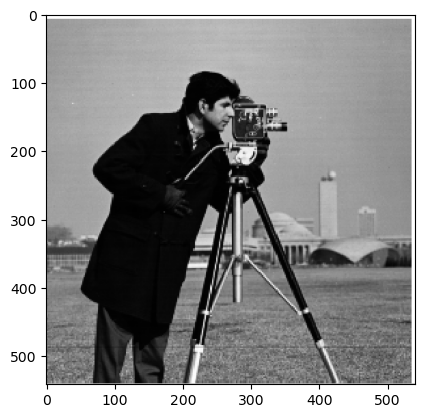

In [50]:
# Get the cameraman image.
cam_man = read_im('../data/cameraman.png')
# Convert it to grayscale.
cam_man_gray = np.mean(cam_man, axis=2) 
print(cam_man_gray.shape)
imshow(cam_man_gray, cmap='gray')

(1, 2)
[[ 1 -1]]


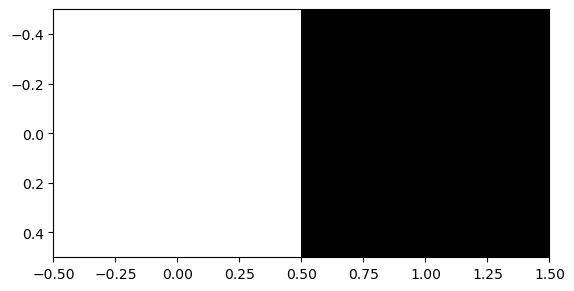

In [51]:
# Code snippet from discussion section 3 notebook.
#dx_op = np.tile(np.array([-1, 0, 1])[None,:], [3, 1]) / 2

# Create the finite difference operator for the partial wrt x
dx_op = np.array([[1, -1]])
print(dx_op.shape)
print(dx_op)
imshow(dx_op, cmap='gray')


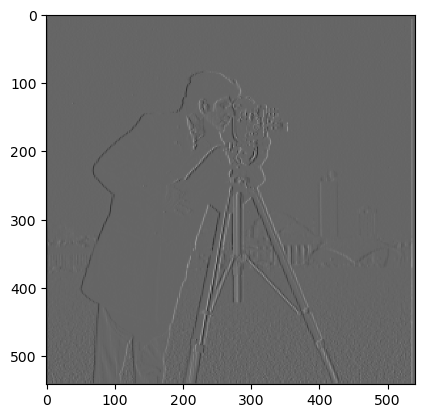

In [55]:
# Take the partial derivative with respect to x by convolving with [1 -1].
cam_man_dx = convolve2d(cam_man_gray, dx_op, mode='same', boundary='fill')
imshow(cam_man_dx, cmap='gray')


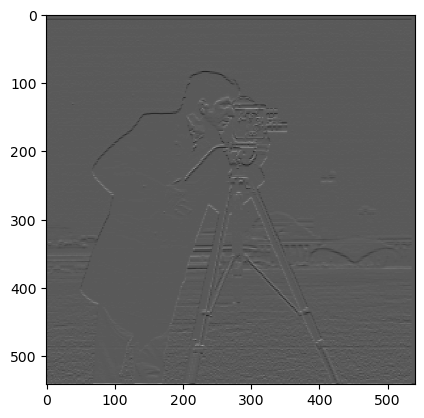

In [56]:
# Take the partial derivative with respect to y by convolving with [1 -1]^T.
dy_op = np.array([[1],
                  [-1]])
cam_man_dy = convolve2d(cam_man_gray, dy_op, mode='same', boundary='fill')
imshow(cam_man_dy, cmap='gray')


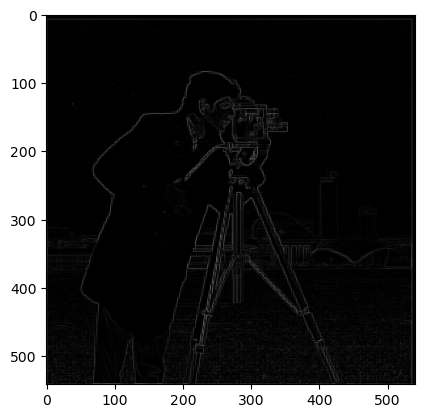

In [60]:
"""
Take the image gradient magnitude and display it.
Each point (y,x) should be equal to sqrt(cam_man_dx[y][x]**2 + cam_man_dy[y][x]**2).
    How can we vectorize this operation?
        1. dot both image with themselves
        2. add the images
        3. square root each element
        Potential problem: Might get some clipping.
    Let's just do a for loop...
"""

cam_man_nabla = np.array(np.zeros_like(cam_man_dx))

for y in range(cam_man_dx.shape[0]):
    for x in range(cam_man_dx.shape[1]):
        cam_man_nabla[y][x] = sqrt(cam_man_dx[y][x]**2 + cam_man_dy[y][x]**2)

imshow(cam_man_nabla, cmap='gray')

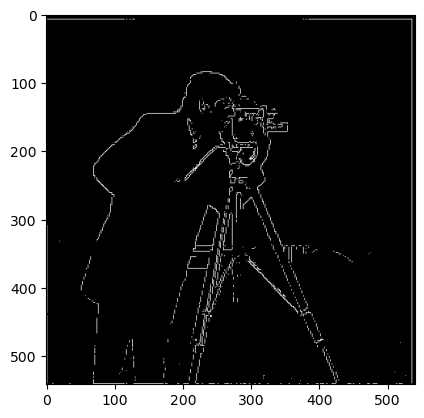

In [67]:
# Binarize the image above some threshold.
cam_man_nabla_binarized = np.array(np.zeros_like(cam_man_nabla))
threshold = 0.2
for y in range(cam_man_nabla.shape[0]):
    for x in range(cam_man_nabla.shape[1]):
        value = cam_man_nabla[y][x] 
        if value >= threshold:
            cam_man_nabla_binarized[y][x] = 1.0

imshow(cam_man_nabla_binarized, cmap='gray')

# Part 1.2: Derivative of Gaussian (DoG) Filter